# Hopf bifucations

[...] occurs when a periodic solution or limit cycle surrounding an equilibirium point arises or goes aways a the control parameter is changed.

Consider

\begin{aligned}
\dot r &= r (\mu - r^2)\\
\dot \theta &= -1\\
\end{aligned}


The stable of the system can be found by solving

$$ \dot r = 0 \rightarrow r = 0 \lor r = \pm \sqrt{\mu}$$

<IPython.core.display.Javascript object>


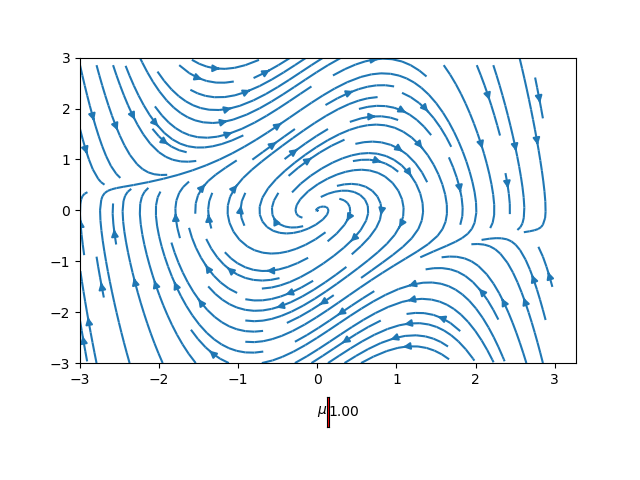

In [18]:
import matplotlib.pyplot as plt, numpy as np, scipy
from matplotlib.widgets import Slider

%matplotlib notebook
def update(x, mu = 1):
   y = x.copy()
   x[0] = y[1]
   x[1] = mu * (1 - y[0]**2) * y[1] - y[0]
   return x

mus = np.linspace(0, 4)
def slider_update(val):
    dX = update(X, slider.val)
    ax.collections = [] # clear lines streamplot
    ax.patches = []
    ax.streamplot(x, y, *dX, color = 'blue')
    
mu = 0
r = np.linspace(-3, 3, 100)
x, y = np.meshgrid(r, r)
X = np.stack((x.ravel(), y.ravel()))
dX= update(X)

dX = dX.reshape(-1, r.size, r.size)
X  = X.reshape(-1, r.size, r.size)

fig, (ax, slax) = plt.subplots(2, gridspec_kw = dict(\
                    height_ratios = [1, .1]))
slider = Slider(slax, '$\mu$', 0, 4, valinit = 1, \
                valstep = .1)
slider.on_changed(slider_update)


h = ax.streamplot(x, y, *dX)
fig.subplots_adjust()
fig.show()

In [21]:
10 % 3

1

<IPython.core.display.Javascript object>


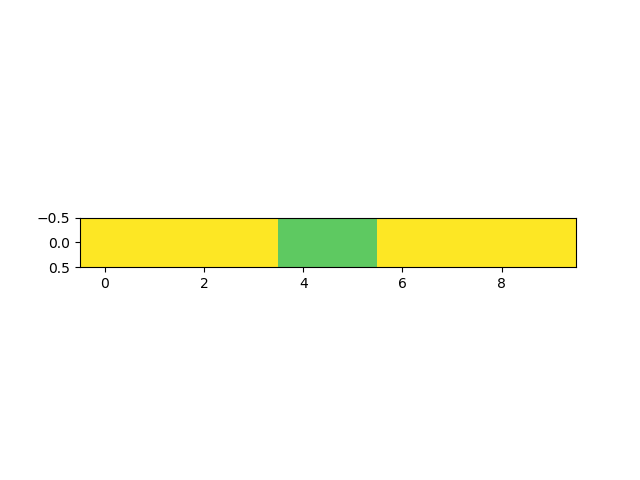

interactive(children=(IntSlider(value=0, description='t', max=500), Output()), _dom_classes=('widget-interact'…

In [46]:
nTrials = 500
nNodes  = 10
threshold = 4
def updateState(state):
    idx = np.random.randint(0, state.size)
    state[idx] += 1
    nodes = np.where(state > threshold)[0]
    
    while nodes.size != 0:
        for node in nodes:
            state[node] -= 2
            if node != 0:
                state[node - 1] += 1
            if node != state.size - 1:
                state[node + 1] += 1
        nodes = np.where(state > threshold)[0]
    return state 
        
states = np.random.randint(0, threshold, size = (nTrials, nNodes))
for trial in range(nTrials):
    states[trial] = updateState(states[trial - 1])
    
import ipywidgets as widget
fig, ax  = plt.subplots()
h = ax.imshow(states[[0]])
fig.show()

@widget.interact(t = widget.IntSlider(min = 0, max = nTrials, value = 0))
def showPlot(t):
    h.set_data(states[[t]])
    fig.canvas.draw()




<IPython.core.display.Javascript object>


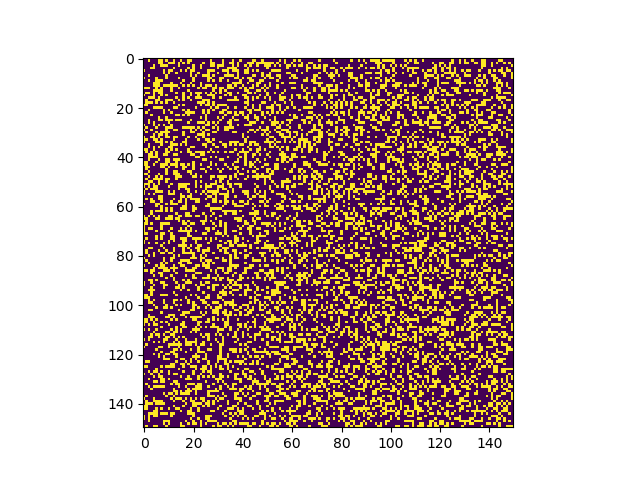

In [80]:
fig, ax =  plt.subplots()
p = 1/3
a = np.random.choice([0, 1], p = [1-p, p], size = (150, 150))
ax.imshow(a)
